# Workshop_III

## 1. In your own words, describe what vector embeddings are and what they are useful for.

### Embedding vectors are numerical representations of objects, concepts, or entities in a multidimensional space, where each dimension corresponds to a specific feature. These embeddings are created using techniques such as word embedding algorithms (e.g., Word2Vec, GloVe) or neural network models (e.g., autoencoders, transformers). The essence of vector embeddings lies in capturing semantic relationships and contextual information among entities in the data.These embeddings are useful for a variety of tasks, including natural language processing (NLP), recommendation systems, information retrieval, and machine learning. They enable algorithms to understand and work with textual or categorical data more effectively by encoding relationships and similarities between elements. For example, in NLP, word embeddings can capture semantic similarity between words, allowing algorithms to understand relationships like "king" is to "queen" as "man" is to "woman".

## 2. What do you think is the best distance criterion to estimate how far two embeddings (vectors) are from each other? Why?

### There are several alternatives for measuring the distance between vectors, such as the Euclidean distance, the Manhattan distance, or the Chebyshev distance. However, these distance criteria invariably involve the magnitude of the vectors. In the specific case of word and phrase embeddings, not only is the magnitude of the vectors important, but also their direction. On one hand, magnitude can provide information about how close two vectors are to each other. However, direction allows us to determine, for example, if a pair of vectors is orthogonal, if they are opposite in direction, or if they are in the same direction or close in direction, since these directional characteristics between two vectors are important in the case of word embeddings to determine contextual or semantic similarity of a pair of embeddings. Therefore, the best criterion in these cases will be cosine similarity since its value, which ranges between 1 and -1, precisely identifies whether a given pair of vectors are orthogonal, opposite, or identical in direction.

# 3

In [2]:
import pickle
import numpy as np
from numpy.linalg import norm
from huggingface_hub import hf_hub_download
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Paso a: Leer el texto desde un archivo .txt y dividirlo en trozos
def leer_texto_desde_archivo(ruta_archivo):
    with open(ruta_archivo, "r", encoding="utf-8") as archivo:
        texto = archivo.read()
    return texto

ruta_archivo = r"D:\UDEA\unsupervised\archivoprueba.txt"
texto = leer_texto_desde_archivo(ruta_archivo)

# Dividir el texto en trozos significativos (por ejemplo, párrafos)
trozos_de_texto = texto.split("\n")  # Dividir por párrafos, ajustar según la estructura del texto

# Imprimir los trozos de texto antes de generar los embeddings
print("Los trozos de texto son:")
for i, trozo in enumerate(trozos_de_texto):
    print(f"{i+1}. {trozo}")

def generar_embeddings_sentence_transformers(parrafos):
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Cargar el modelo Sentence Transformers
    embeddings = model.encode(parrafos, convert_to_tensor=True)  # Generar embeddings para los párrafos
    return embeddings

def obtener_parralos_mas_relevantes(pregunta, trozos_de_texto, embeddings_parrafos, n=5):
    # Generar embedding para la pregunta
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Cargar el modelo Sentence Transformers
    embedding_pregunta = model.encode([pregunta], convert_to_tensor=True)
    
    # Calcular la similitud coseno entre la pregunta y cada párrafo del texto
    similitudes = cosine_similarity(embedding_pregunta, embeddings_parrafos)[0]
    
    # Ordenar los trozos de texto según su similitud con la pregunta
    trozos_ordenados = [trozo for _, trozo in sorted(zip(similitudes, trozos_de_texto), reverse=True)]
    
    # Devolver los N trozos más relevantes
    return trozos_ordenados[:n]

# Generar embeddings para cada párrafo utilizando Sentence Transformers
embeddings_parrafos = generar_embeddings_sentence_transformers(trozos_de_texto)

# Ejemplo de pregunta
pregunta = "¿Cuál fue uno de los álbumes más exitosos de Michael Jackson?"

# Obtener los trozos más relevantes para la pregunta
trozos_relevantes = obtener_parralos_mas_relevantes(pregunta, trozos_de_texto, embeddings_parrafos)




Los trozos de texto son:
1. Michael Jackson fue un cantante, productor, bailarín e icono pop, uno de los artistas más importantes del S. XX. Su éxito y relevancia le valió el apodo de “rey del pop”.
2. 
3. Nació en 1958 en Indiana, en el seno de una familia afrodescendiente con diez hijos, entre ellos La Toya y Janet Jackson. Con 11 años formó el grupo Jackson Five junto a cinco de sus hermanos. Con aquella banda comenzó a saborear las mieles del éxito y la fama. También los primeros golpes. Según contó Jackson en sus memorias, Moonwalk (1988), actuaban para su padre, que los juzgaba duramente. “Si te equivocabas, te golpeaba. A veces con un cinturón, otras veces con una vara”.
4. 
5. Además de la banda con sus hermanos, en sus inicios Michael lanzó cuatro álbumes en solitario con Motown, la mítica discográfica dedicada a la música afroamericana.
6. 
7. Finalizada su época Motown, publicó el disco Thriller (1982), un álbum con el que ganó siete Grammy y ocho premios American Music, y q

In [3]:
# Imprimir los trozos más relevantes
print("Los trozos más relevantes para la pregunta son:")
for i, trozo in enumerate(trozos_relevantes):
    print(f"{i+1}. {trozo}")

Los trozos más relevantes para la pregunta son:
1. Michael Jackson fue un cantante, productor, bailarín e icono pop, uno de los artistas más importantes del S. XX. Su éxito y relevancia le valió el apodo de “rey del pop”.
2. Finalizada su época Motown, publicó el disco Thriller (1982), un álbum con el que ganó siete Grammy y ocho premios American Music, y que se convirtió en el álbum más vendido de todos los tiempos con más de 50 millones de copias en todo el mundo. Su single de lanzamiento Thriller, se acompañó de un cortometraje de doce minutos que arrasó en la edad de oro del videoclip y en el que Jackson aparecía bailando con una chaqueta de cuero roja, unos mocasines negros y unos calcetines blancos.
3. Nació en 1958 en Indiana, en el seno de una familia afrodescendiente con diez hijos, entre ellos La Toya y Janet Jackson. Con 11 años formó el grupo Jackson Five junto a cinco de sus hermanos. Con aquella banda comenzó a saborear las mieles del éxito y la fama. También los primeros

In [5]:
# Imprimir los embeddings de los párrafos
print("Embeddings de los párrafos:")
for i, embedding in enumerate(embeddings_parrafos):
    print(f"Párrafo {i+1}: {embedding}")

Embeddings de los párrafos:
Párrafo 1: tensor([ 1.7447e-01,  3.5354e-02,  2.1633e-01, -3.5869e-01, -8.4569e-02,
         1.1535e-01,  5.3388e-01,  1.7369e-01, -6.6934e-02, -2.5043e-01,
         3.6274e-01, -3.1950e-01, -2.9831e-01,  3.2708e-02, -2.5887e-02,
        -1.2467e-01,  5.5341e-01,  5.6388e-01, -3.9105e-01,  4.6548e-02,
         8.1066e-01, -1.0310e-01, -9.0121e-02, -1.6071e-01, -6.0826e-01,
         1.1893e-01, -5.0891e-02,  9.5195e-02,  3.1776e-02, -2.4494e-01,
         8.5830e-02,  2.0474e-01,  2.4688e-01,  1.5820e-01, -2.1745e-02,
        -1.3940e-01, -4.4936e-04,  3.3641e-01,  9.3224e-03, -2.8112e-01,
         1.3512e-01, -1.2847e-01, -2.0723e-01,  1.9118e-02, -3.1034e-02,
        -5.1077e-01, -2.2388e-01, -2.4944e-01,  1.2407e-01, -1.2947e-01,
        -2.7716e-01,  7.5854e-03,  8.7596e-02, -6.0637e-01, -1.0501e-01,
        -5.9723e-02,  4.3182e-01,  2.3171e-01,  1.5027e-01,  6.3033e-02,
        -2.7692e-01,  2.8744e-01, -1.3698e-01,  1.6554e-01,  1.0271e-02,
        -1.3

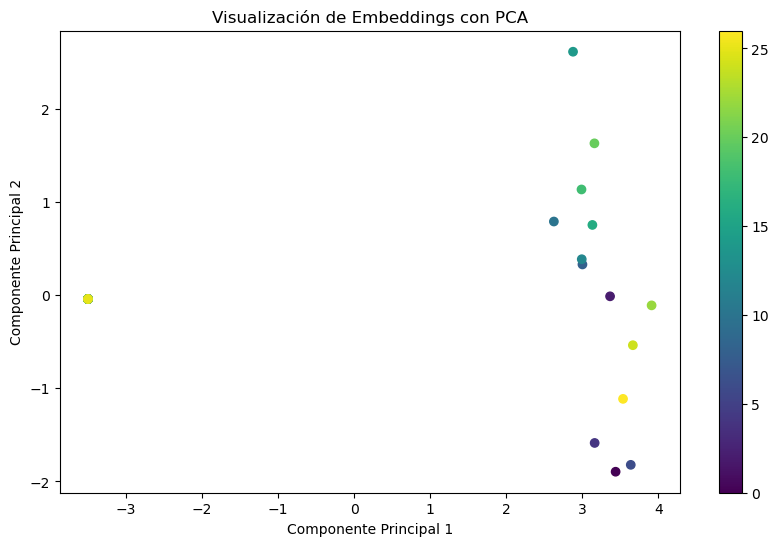

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualizar_embeddings(embeddings, labels):
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Visualización de Embeddings con PCA')
    plt.show()

# Suponiendo que tienes embeddings y etiquetas
# embeddings es una matriz donde cada fila es un embedding
# labels es una lista de etiquetas para cada embedding
visualizar_embeddings(embeddings_parrafos, range(len(embeddings_parrafos)))


## 4 What do you think that could make these types of systems more robust in terms of semantics and functionality?


### From our perspective, enhancing robustness in natural language processing (NLP) systems involves a combination of technical approaches and practical considerations. Firstly, it is crucial to ensure the quality of the data used to train these systems, as the accuracy and representativeness of the datasets directly influence the model's ability to understand and generate text coherently. Additionally, the integration of pre-trained embeddings, such as those offered by models like BERT and GPT, provides a solid foundation for capturing language semantics more effectively.

### Another important aspect is the adaptability of the models to specific domains through fine-tuning techniques and transfer learning. By customizing pre-trained models for particular contexts, their ability to understand and generate relevant text in specific scenarios is enhanced. Furthermore, the integration of multiple data modalities, such as text, image, and audio, can enrich semantic understanding and improve the functionality of NLP systems.

### Ethical considerations, such as fairness and bias, also play a crucial role in building robust and responsible NLP systems. Addressing these issues from the very design of the models to their practical implementation is essential to ensure that NLP systems are fair and reliable for all users.

### In summary, enhancing robustness in NLP systems requires a comprehensive approach that combines advanced modeling techniques with ethical and practical considerations. By doing so, we can move towards more reliable and effective NLP systems that meet the needs of a variety of applications and users.

# 5

In [7]:
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Paso a: Leer el texto desde un archivo .txt y dividirlo en trozos
def leer_texto_desde_archivo(ruta_archivo):
    with open(ruta_archivo, "r", encoding="utf-8") as archivo:
        texto = archivo.read()
    return texto

ruta_archivo = r"D:\UDEA\unsupervised\archivoprueba.txt"
texto = leer_texto_desde_archivo(ruta_archivo)

# Dividir el texto en trozos significativos (por ejemplo, párrafos)
trozos_de_texto = texto.split("\n")  # Dividir por párrafos, ajustar según la estructura del texto

# Imprimir los trozos de texto antes de generar los embeddings
print("Los trozos de texto son:")
for i, trozo in enumerate(trozos_de_texto):
    print(f"{i+1}. {trozo}")

def generar_embeddings_sentence_transformers(parrafos):
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Cargar el modelo Sentence Transformers
    embeddings = model.encode(parrafos, convert_to_tensor=True)  # Generar embeddings para los párrafos
    return embeddings

# Generar embeddings para cada párrafo utilizando Sentence Transformers
embeddings_parrafos = generar_embeddings_sentence_transformers(trozos_de_texto)

# Guardar los embeddings en un archivo utilizando pickle
ruta_archivo_embeddings = 'embeddings_parrafos.pkl'
with open(ruta_archivo_embeddings, 'wb') as embeddings_file:
    pickle.dump(embeddings_parrafos, embeddings_file)


Los trozos de texto son:
1. Michael Jackson fue un cantante, productor, bailarín e icono pop, uno de los artistas más importantes del S. XX. Su éxito y relevancia le valió el apodo de “rey del pop”.
2. 
3. Nació en 1958 en Indiana, en el seno de una familia afrodescendiente con diez hijos, entre ellos La Toya y Janet Jackson. Con 11 años formó el grupo Jackson Five junto a cinco de sus hermanos. Con aquella banda comenzó a saborear las mieles del éxito y la fama. También los primeros golpes. Según contó Jackson en sus memorias, Moonwalk (1988), actuaban para su padre, que los juzgaba duramente. “Si te equivocabas, te golpeaba. A veces con un cinturón, otras veces con una vara”.
4. 
5. Además de la banda con sus hermanos, en sus inicios Michael lanzó cuatro álbumes en solitario con Motown, la mítica discográfica dedicada a la música afroamericana.
6. 
7. Finalizada su época Motown, publicó el disco Thriller (1982), un álbum con el que ganó siete Grammy y ocho premios American Music, y q

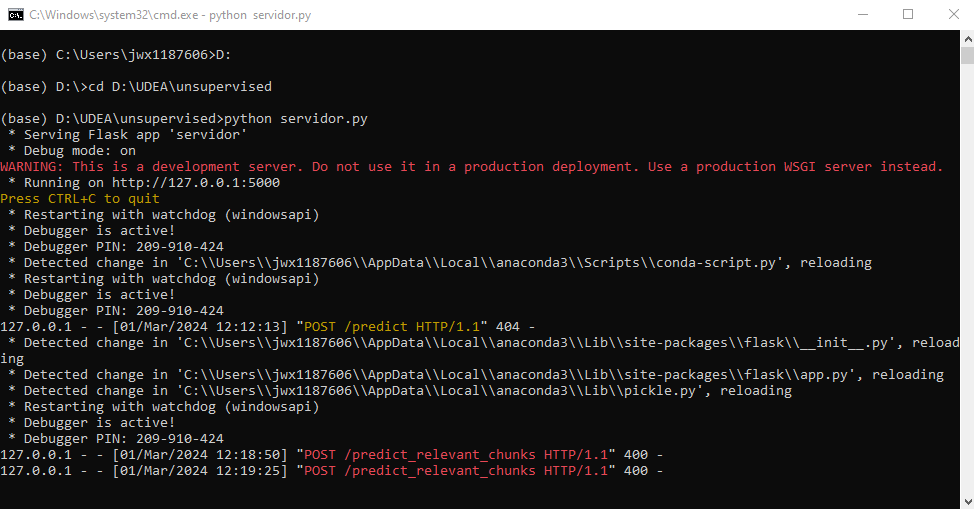

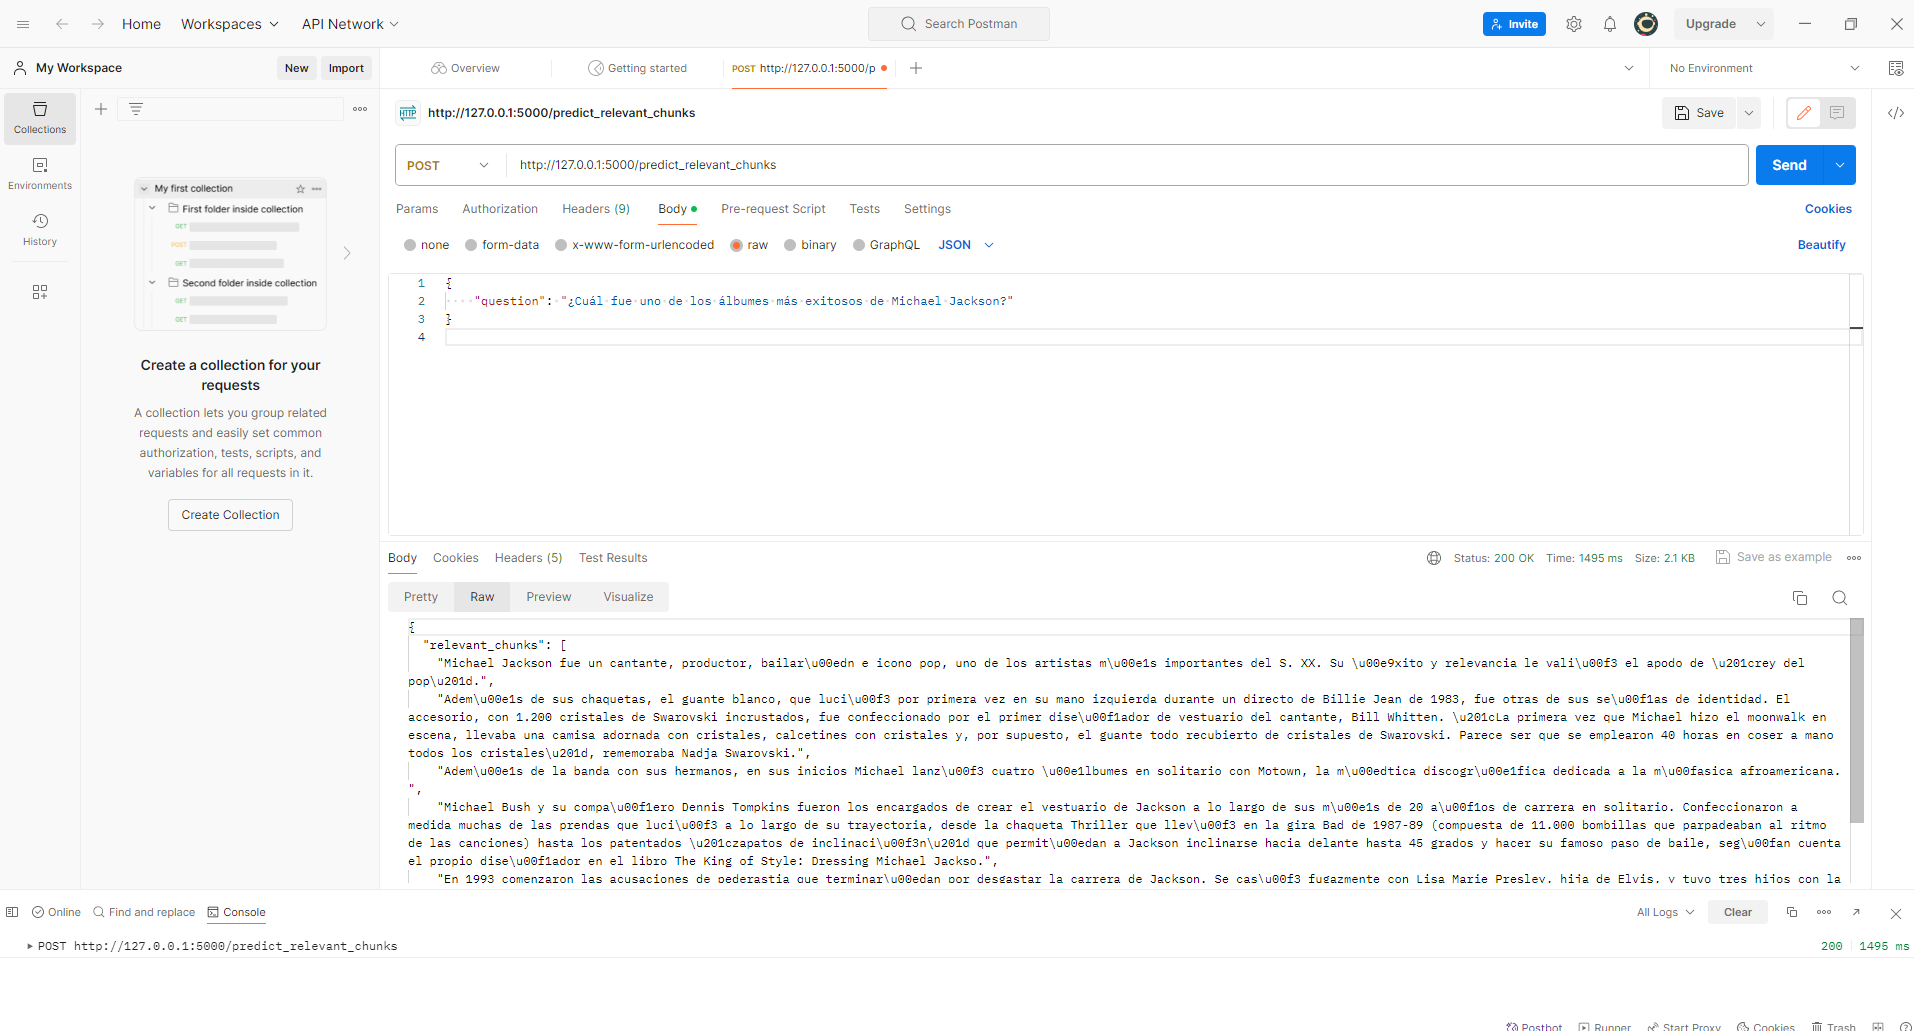